## Measure model performance and understand errors.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# Load data
data = pd.read_csv("../data/student_data_cleaned.csv")

In [9]:
# Seperate Features and Target
X = data.drop(columns=['G3'])
y = data['G3']

X.shape,y.shape

((395, 32), (395,))

In [10]:
# Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions
y_pred = model.predict(X_test)

## Evalutaion Metrics

MEAN ABSOLUTE ERROR (MAE)

In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

# on average, how many grade points is the model wrong?

1.6466656197147507

MEAN SQUARED ERROR (MSE)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

5.656642833231222

ROOT MEAN SQUARED ERROR

In [21]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
rmse

2.3783697847961367

R^2 Score

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.7241341236974022

# Error Analysis

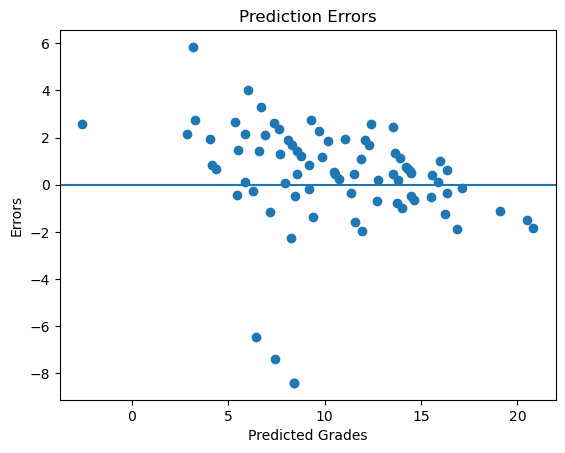

In [27]:
import matplotlib.pyplot as plt

errors = y_test - y_pred

plt.figure()
plt.scatter(y_pred, errors)
plt.axhline(0)
plt.xlabel('Predicted Grades')
plt.ylabel('Errors')
plt.title('Prediction Errors')
plt.show()

## Error Analysis

The error plot shows how prediction errors are distributed.
Most errors are centered around zero, but some students
have larger prediction errors, possibly due to factors
not captured in the data.